<a href="https://colab.research.google.com/github/Sudharshinijothikumar/Bathing-Buddy-Classifier/blob/main/BABY_PRODUCT_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bathing Buddy Classifier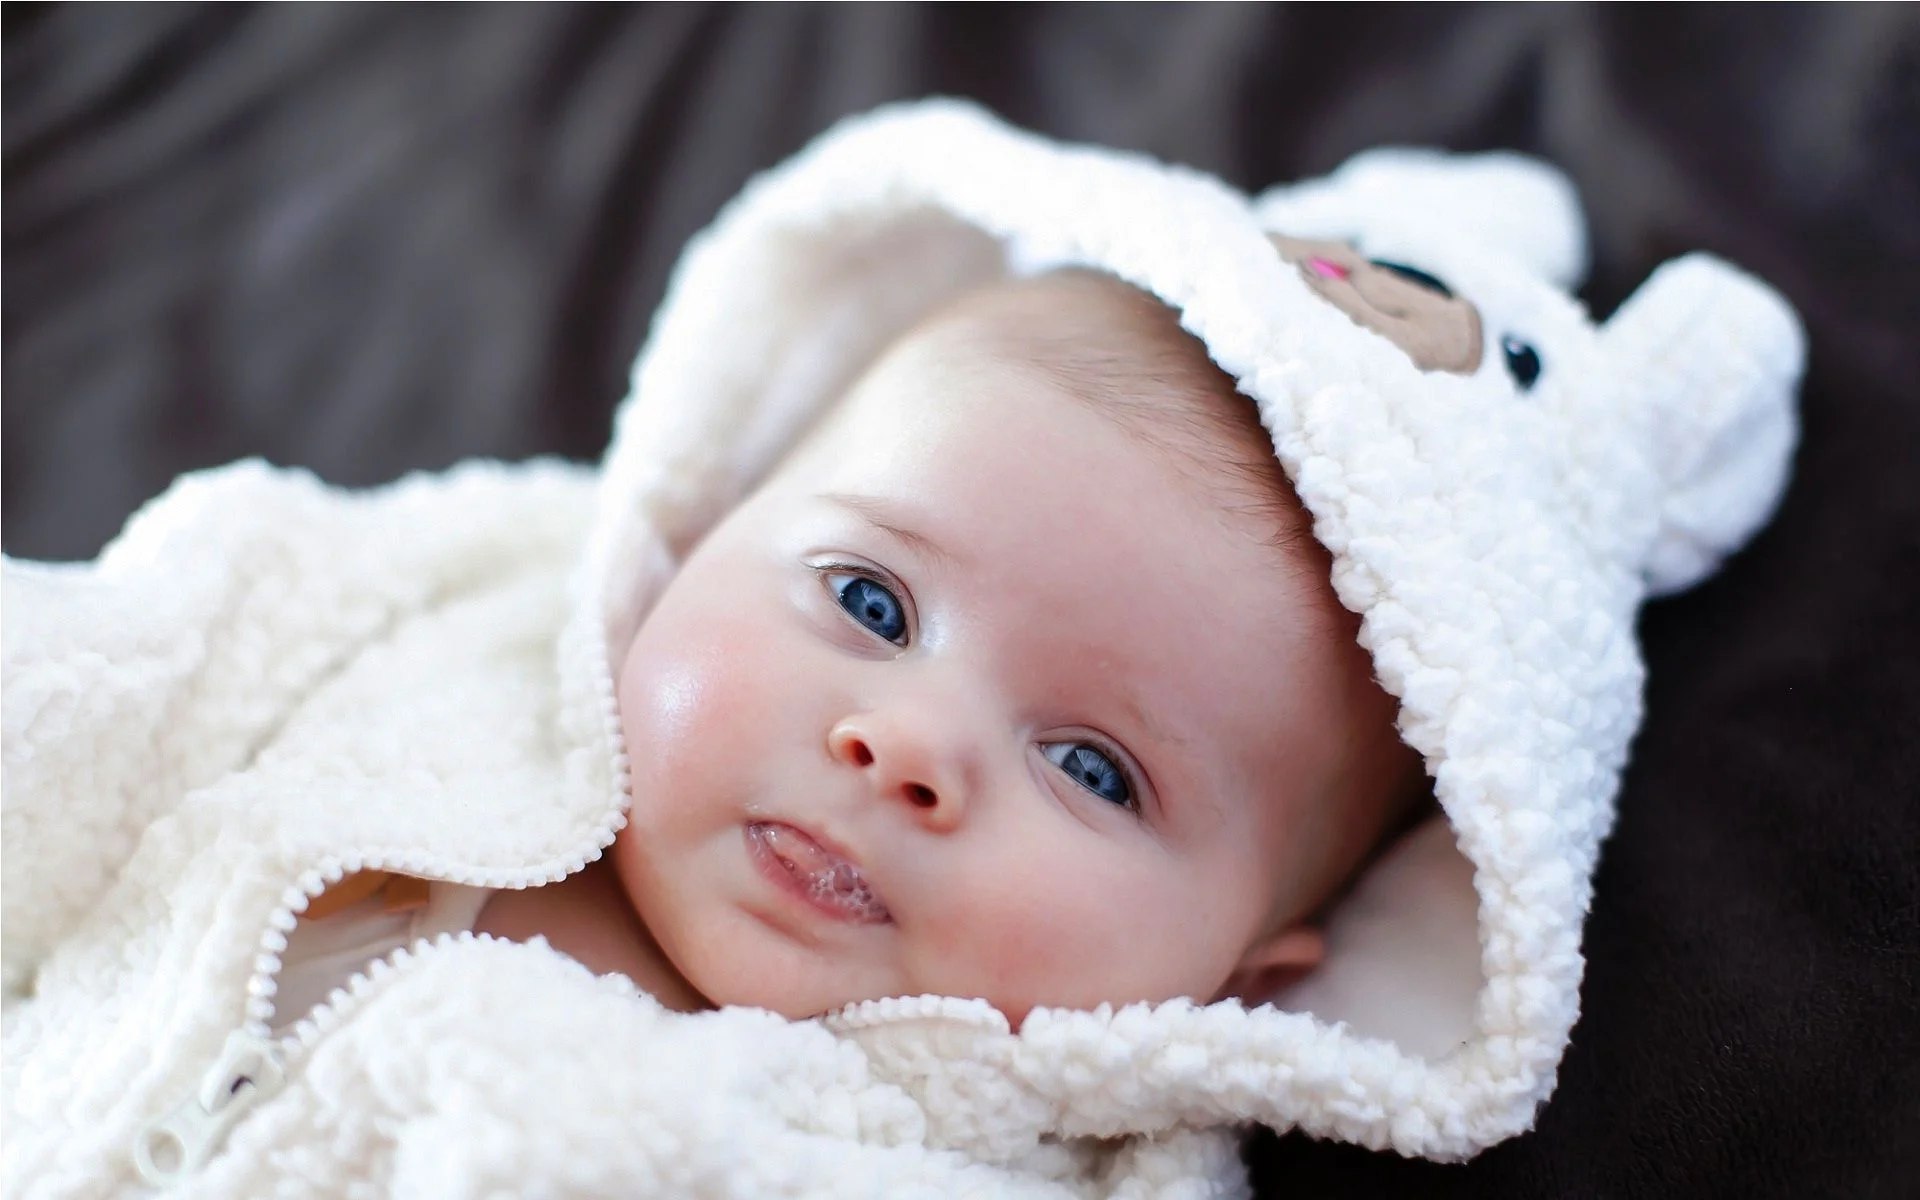

Introducing the "Bathing Buddy Classifier": Your Trusted Companion in Navigating the World of Kids' Bathing Products

In the ever-expanding market of kids' bathing essentials, finding the perfect product that strikes the balance between safety, effectiveness, and overall goodness can be a daunting task for parents and caregivers alike. Enter the "Bathing Buddy Classifier" – your personalized guide to selecting the best bathing materials for your little ones.

Harnessing the power of machine learning, the Bathing Buddy Classifier sifts through a wealth of data to evaluate each product's attributes with precision. From assessing the presence of sulfates, parabens, and phthalates to scrutinizing pH levels, greasiness, and smoothness, our classifier leaves no stone unturned in its quest to identify the crème de la crème of kids' bathing products.

But our classifier goes beyond mere scrutiny; it's a beacon of trust and reassurance in an ocean of choices. With its ability to predict product usage based on a myriad of factors, including certifications, doctor recommendations, and user feedback, the Bathing Buddy Classifier empowers parents to make informed decisions tailored to their child's unique needs.

Why is this classifier so essential? In a world where the well-being of our little ones takes precedence above all else, ensuring that every bath time experience is not only safe but also enjoyable becomes paramount. By leveraging cutting-edge technology, the Bathing Buddy Classifier streamlines the process of selecting bathing products, saving parents valuable time and energy while instilling confidence in their choices.

So, whether you're a seasoned parent navigating the aisles of the supermarket or a new caregiver embarking on the journey of childcare, let the Bathing Buddy Classifier be your trusted ally in creating moments of joy, comfort, and cleanliness for the ones you cherish most. After all, every splash, giggle, and squeal of delight begins with the perfect bath – and with the Bathing Buddy Classifier by your side, you're one step closer to making those moments truly unforgettable.

# ABOUT THE DATASET


1. id: A unique identifier for each record in the dataset.

2. proname: The name or label of the bathing product. Each product is identified by a unique name.

3. sulfates: A binary feature indicating the presence (1) or absence (0) of sulfates in the product. Sulfates are commonly found in cleansing agents and may affect skin sensitivity.

4. parabens: A binary feature indicating the presence (1) or absence (0) of parabens in the product. Parabens are preservatives that some people prefer to avoid due to potential health concerns.

5. phthalates: A binary feature indicating the presence (1) or absence (0) of phthalates in the product. Phthalates are chemicals often used to soften plastics and may have potential health risks.

6. greasy: A rating (0 to 10) representing the perceived greasiness of the product. Higher values indicate a greasier texture.

7. smooth: A rating (0 to 10) representing the perceived smoothness of the product. Higher values indicate a smoother texture.

8. ph: A rating (0 to 10) representing the pH level of the product. pH levels closer to 7 are considered neutral, while lower values are acidic and higher values are alkaline.

9. certified: A binary feature indicating whether the product is certified (1) or not (0). Certification may indicate adherence to certain quality or safety standards.

10. doctor_recommend: A binary feature indicating whether the product is recommended by doctors or healthcare professionals (1) or not (0).

11. usage: The target variable to predict, indicating whether the product is suitable for usage (1) or not (0) based on its attributes and other features.

This dataset provides a comprehensive set of features that capture various aspects of bathing products, including ingredients, texture, pH level, certifications, and recommendations. The goal is to predict the suitability of each product for usage based on these features, helping parents and caregivers make informed decisions about selecting safe and effective bathing products for their children.

In [ ]:
#import the necessary things
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
#get the dataset
data=pd.read_csv("/content/Book1.csv")

In [ ]:
data.head()

,id,Product_name,sulfates,phthalates,parabens,Certified,Doctor_recommended,Smooth,greasy,PH Value,USAGE
0,1,Olson Group,NaN,NaN,NaN,NaN,1.0,7.80,3.8,7.4,1.0
1,2,Rippin Inc,NaN,NaN,NaN,1.0,NaN,9.90,2.2,7.5,1.0
2,3,Muller Group,NaN,1.0,1.0,NaN,1.0,3.60,8.3,1.0,NaN
3,4,Fay-Metz,NaN,NaN,1.0,1.0,1.0,4.91,6.9,5.5,NaN
4,5,"Zboncak, Hyatt and Kuhn",NaN,1.0,NaN,NaN,NaN,6.30,6.0,1.8,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  50 non-null     int64  
 1   Product_name        50 non-null     object 
 2   sulfates            28 non-null     float64
 3   phthalates          22 non-null     float64
 4   parabens            18 non-null     float64
 5   Certified           21 non-null     float64
 6   Doctor_recommended  22 non-null     float64
 7   Smooth              50 non-null     float64
 8   greasy              50 non-null     float64
 9   PH Value            50 non-null     float64
 10  USAGE               22 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 4.4+ KB


In [ ]:
data.describe()

,id,sulfates,phthalates,parabens,Certified,Doctor_recommended,Smooth,greasy,PH Value,USAGE
count,50.00000,28.0,22.0,18.0,21.0,22.0,50.000000,50.000000,50.000000,22.0
mean,25.50000,1.0,1.0,1.0,1.0,1.0,5.737200,5.709600,5.756800,1.0
std,14.57738,0.0,0.0,0.0,0.0,0.0,2.825901,2.609606,2.265862,0.0
min,1.00000,1.0,1.0,1.0,1.0,1.0,1.020000,0.780000,1.000000,1.0
25%,13.25000,1.0,1.0,1.0,1.0,1.0,3.395000,3.650000,4.600000,1.0
50%,25.50000,1.0,1.0,1.0,1.0,1.0,5.800000,6.050000,6.795000,1.0
75%,37.75000,1.0,1.0,1.0,1.0,1.0,8.082500,7.800000,7.445000,1.0
max,50.00000,1.0,1.0,1.0,1.0,1.0,9.900000,9.800000,9.160000,1.0


In [ ]:
data.isnull().sum()

id                     0
Product_name           0
sulfates              22
phthalates            28
parabens              32
Certified             29
Doctor_recommended    28
Smooth                 0
greasy                 0
PH Value               0
USAGE                 28
dtype: int64

# DATA PREPROCESSING

In [ ]:
data = data.fillna(False)

In [ ]:
data['sulfates_presence']=data['sulfates'].astype(int)

In [ ]:
data['phthalates_presence']=data['phthalates'].astype(int)
data['parabens_presence']=data['parabens'].astype(int)
data['cerified_encoded']=data['Certified'].astype(int)
data['Doctor_recommended_encoded']=data['Doctor_recommended'].astype(int)
data['Usage_result']=data['USAGE'].astype(int)


In [ ]:
data.head(1)

,id,Product_name,sulfates,phthalates,parabens,Certified,Doctor_recommended,Smooth,greasy,PH Value,USAGE,sulfates_presence,phthalates_presence,parabens_presence,cerified_encoded,Doctor_recommended_encoded,Usage_result
0,1,Olson Group,False,False,False,False,1.0,7.8,3.8,7.4,1.0,0,0,0,0,1,1


In [ ]:
x = data[['id','Smooth','greasy','PH Value','sulfates_presence','phthalates_presence','parabens_presence','cerified_encoded','Doctor_recommended_encoded']]
y = data['Usage_result']


# Train Test Splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Training

In [ ]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred=model.predict(x_test)
accuracy=mean_squared_error(y_test,y_pred)
print(accuracy)


0.0


In [ ]:
a=[51,1.6,9,.2,0,0,0,1,1]
model.predict([a])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])